In [1]:
import numpy as np

# 이상치 미존재
x1 = np.array([10,9,3,2])
y1 = np.array([90,80,50,30])

# 이상치 존재
x2 = np.array([10,9,3,2,11])
y2 = np.array([90,80,50,30,40])

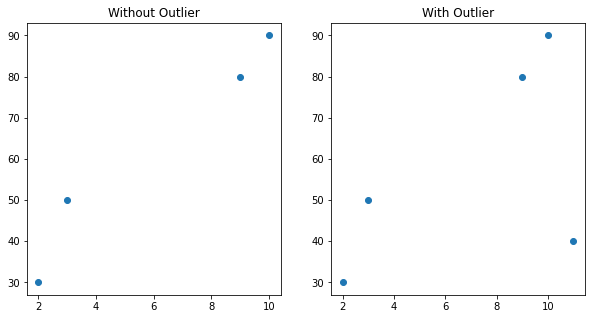

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x1,y1)
plt.title('Without Outlier')

plt.subplot(1,2,2)
plt.scatter(x2,y2)
plt.title('With Outlier')
plt.show()

In [3]:
# 최소 제곱법(Ordinary Least Squared) - 직접 구현
def OLS(x,y) :
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [4]:
w1, b1 = OLS(x1,y1)
w1, b1

(6.6, 22.900000000000006)

In [5]:
w2, b2 = OLS(x2,y2)
w2,b2

(3.4285714285714284, 34.0)

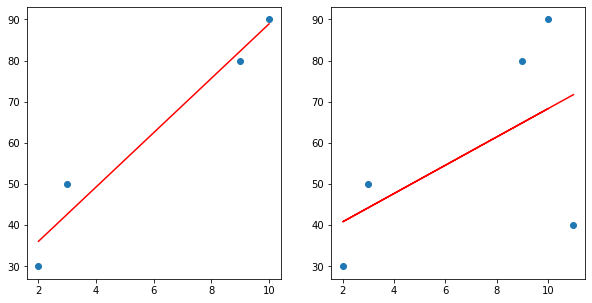

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x1,y1)
plt.plot(x1,x1*w1+b1,c='red') # 교재 40페이지 5번줄이랑 동일.

plt.subplot(1,2,2)
plt.scatter(x2,y2)
plt.plot(x2,x2*w2+b2,c='red') # 교재 40페이지 11번줄이랑 동일.

plt.show()

In [14]:
x1

array([10,  9,  3,  2])

In [9]:
x1.reshape(2,2)

array([[10,  9],
       [ 3,  2]])

In [13]:
x1.reshape(-1,1)

array([[10],
       [ 9],
       [ 3],
       [ 2]])

In [15]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1,1),y1)
print(model1.coef_, model1.intercept_)

(array([6.6]), 22.899999999999984)

In [17]:
model2 = LinearRegression().fit(x2.reshape(-1,1),y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

In [24]:
import pandas as pd
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv"
boston = pd.read_csv(url)
boston.drop('Unnamed: 0',
    axis=1,
    inplace=True)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [25]:
from sklearn.model_selection import train_test_split

# x = boston.loc[:,'crime':'lstat']
x = boston.iloc[:,:-1] # 얘도 가능.
y = boston.iloc[:,-1]
# y = boston.loc[:,'medv'] # 얘도 가능
print(x.shape, y.shape)

(506, 13) (506,)


In [33]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x,
                                         y,
                                         random_state=0, # stratify는 분류시 사용. 여기서는 사용 X.
                                         test_size=0.2 # 0.2가 기본. 훈련은 0.8
                                         )

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr, y_tr)
model.score(x_tr,y_tr), model.score(x_te,y_te)

(0.7730135569264234, 0.589222384918251)

In [35]:
# 모델의 기울기
model.coef_, model.intercept_

(array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
        -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
         2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
        -4.92792725e-01]),
 38.09169492630278)

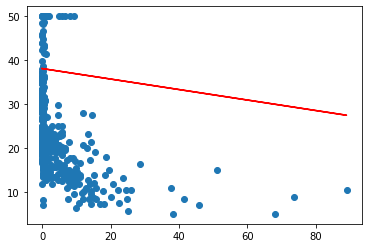

In [42]:
import matplotlib.pyplot as plt

plt.scatter(
    boston.iloc[:,0], #x축값.
    boston.iloc[:,-1]
)
plt.plot(
    boston.iloc[:,0],
    boston.iloc[:,0]*model.coef_[0]+model.intercept_,
    c='red'#coef의 0번째 값
    
)

In [44]:
# x 배열의 행, 열 정보 중에서 열 정보.
x.shape[1]

13

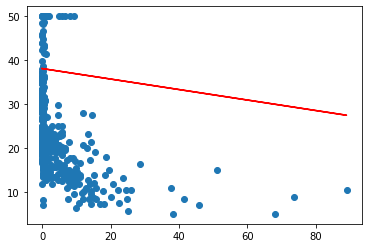

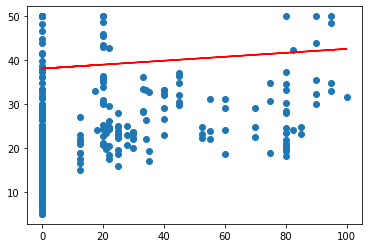

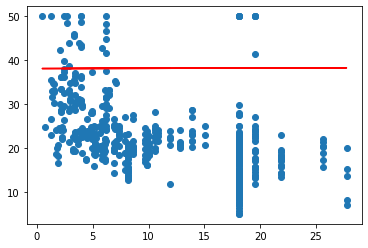

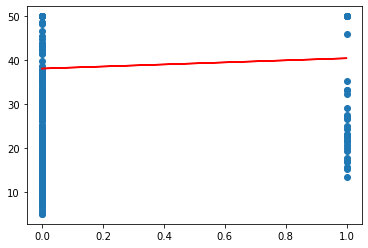

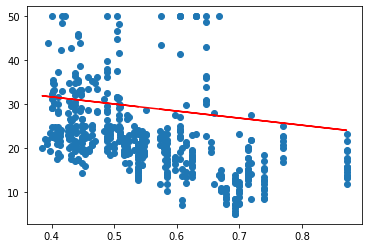

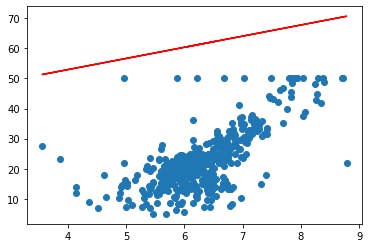

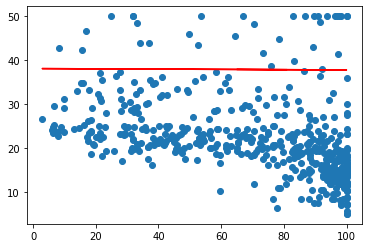

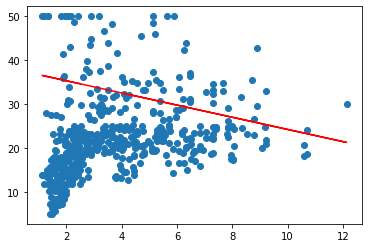

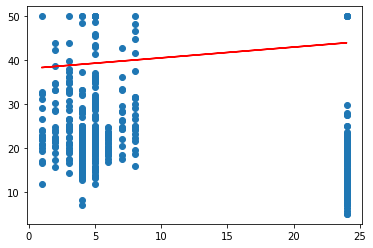

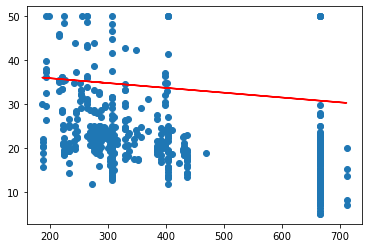

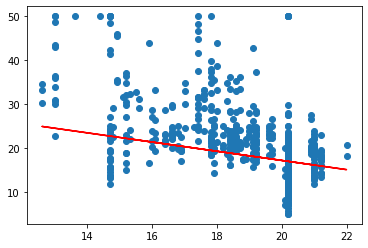

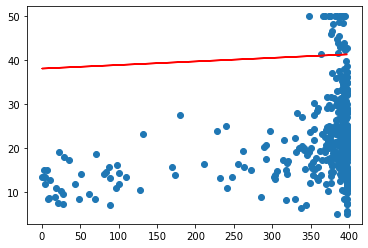

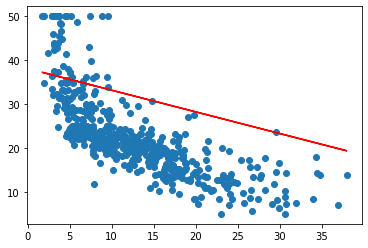

In [47]:
import matplotlib.pyplot as plt

# 칼럼의 갯수(=x의 칼럼의 개수 or model.coef_의 개수 만큼 반복해야함.
for i in range(x.shape[1]) :
    plt.figure(i) # 그리는 공간을 의미. figure가 같으면 같은 그림에 중복해서 그리게 됨.
    plt.scatter(
        boston.iloc[:,i], #x축값.
        boston.iloc[:,-1]
    )
    plt.plot(
        boston.iloc[:,i],
        boston.iloc[:,i]*model.coef_[i]+model.intercept_,
        c='red'#coef의 0번째 값
    )

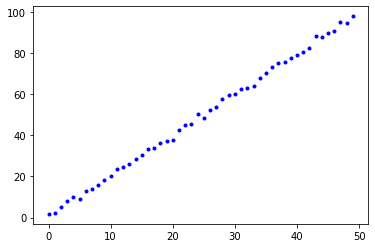

In [50]:
import numpy as np

np.random.seed(0) # 난수발생의 기준값
X = np.arange(50)
Y = (2*X) + 10 * np.random.randn(50)
plt.plot(X,Y,'b.')

In [ ]:
w_range = np.arange(0.1, 4.1, 0.1)
costs = []
for w in w_range:
    h=w*X
    cost = 1/50*np.sum

In [51]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [52]:
Y

array([ 1.76405235,  2.40015721,  4.97873798,  8.2408932 ,  9.86755799,
        9.02272212, 12.95008842, 13.84864279, 15.89678115, 18.4105985 ,
       20.14404357, 23.45427351, 24.76103773, 26.12167502, 28.44386323,
       30.33367433, 33.49407907, 33.79484174, 36.3130677 , 37.14590426,
       37.44701018, 42.6536186 , 44.8644362 , 45.25783498, 50.26975462,
       48.54563433, 52.04575852, 53.81281615, 57.53277921, 59.46935877,
       60.15494743, 62.37816252, 63.11221425, 64.01920353, 67.65208785,
       70.15634897, 73.23029068, 75.20237985, 75.61267318, 77.69769725,
       78.95144703, 80.57998206, 82.29372981, 87.9507754 , 87.49034782,
       89.5619257 , 90.74720464, 94.77749036, 94.38610215, 97.78725972])

In [53]:
W=0
W*X

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [56]:
# 평균 오차 제곱
np.mean((W*X - Y)**2)

3225.0637850595776

In [57]:
np.mean((W*X - Y)**2)

3225.0637850595776

In [67]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=100000).fit(x_tr,y_tr)
model.score(x_te,y_te)

-3.282762997886048e+26

In [73]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=10000,verbose=1).fit(X.reshape(-1,1),Y)
# verbose 는 가장 기본적으로 제공해줌. log찍어주는 속성. 
# verbose = 0 => 내부 동작 과정 안알려줌,
# verbose = 1 => 내부 동작 과정 알려줌.
# max_iter와 verbose는 거의 관습적으로 제공해주는 애들임. 
# loss값 알아내려면 verbose=1로 알아낼 수 있음.

-- Epoch 1
Norm: 44339549833.92, NNZs: 1, Bias: -543178267.403507, T: 50, Avg. loss: 78949750805722325581824.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4127783559.81, NNZs: 1, Bias: -14330093966.149090, T: 100, Avg. loss: 888409345344141480951808.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 66975283503.56, NNZs: 1, Bias: -14473085602.119644, T: 150, Avg. loss: 388212157131607880237056.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 53241631394.97, NNZs: 1, Bias: -18268084286.603088, T: 200, Avg. loss: 381776336110508706889728.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18219937427.13, NNZs: 1, Bias: -19741564770.163895, T: 250, Avg. loss: 109895518136959303155712.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4049481981.86, NNZs: 1, Bias: -19103264573.307034, T: 300, Avg. loss: 110266439529258098360320.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds


##### PolynomialFeatures
- XO 특성을 2차항 변환(상수항 포함)

In [75]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(5).reshape(-1,1)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [77]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1,2)
pd.DataFrame(P.fit_transform(x),columns=P.get_feature_names())


,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


In [79]:
from sklearn.model_selection import train_test_split

# x = boston.loc[:,'crime':'lstat']
x = boston.iloc[:,:-1] # 얘도 가능.
y = boston.iloc[:,-1]
# y = boston.loc[:,'medv'] # 얘도 가능

from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3, include_bias=False)
x_poly = P.fit_transform(x)

x_tr, x_te, y_tr, y_te = train_test_split (
    x_poly,
    y,
    random_state=0
)
print('x_tr.shape: ',x_tr.shape)
print('y_tr.shape: ',y_tr.shape)

x_tr.shape:  (379, 559)
y_tr.shape:  (379,)


In [80]:
model = LinearRegression().fit(x_tr,y_tr)
model.score(x_tr,y_tr),model.score(x_te,y_te)

(1.0, -9443.834670904835)

In [83]:
from sklearn.preprocessing import MinMaxScaler
P = PolynomialFeatures(degree=3, include_bias=False)
x_scaled = MinMaxScaler().fit_transform(boston.loc[:,'crim':'lstat'])
y = boston.loc[:,'medv']
x_poly = P.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly,y,random_state=0)

In [84]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1).fit(x_train, y_train)
model.score(x_train,y_train), model.score(x_test,y_test)

(0.9242749146283599, 0.7865342899841057)

In [85]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
ridge01.score(x_train, y_train), ridge01.score(x_test, y_test)

(0.953715539703466, 0.79055704321102)

In [86]:
ridge10 = Ridge(alpha=10).fit(x_train,y_train)
ridge10.score(x_train,y_train), ridge10.score(x_test,y_test)

(0.85555019397812, 0.7230747746713169)